In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df = pd.read_excel('hallazgos_clean.xlsx')

df.head()

,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,fecha_desembolso,...,calificacion_cartera,relaciones_laborales,oficina,zona,regional,estado,year,tipo,riesgo,riesgo_int
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros,15069268,792642,36,2021-06-11,...,Si,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad,1 - Alto,1
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,2021-06-15,...,No,Si,poblado,1,1,castigo,2022,afecta estabilidad,1 - Alto,1
2,2,Jose Armando Agudelo Gomez,HZT,No_especificado,gallera_trebol,otros,1433360,178915,15,2022-10-02,...,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad,1 - Alto,1
3,3,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,2022-05-03,...,Si,Si,dosquebradas,12,4,modificado,2022,afecta estabilidad,1 - Alto,1
4,4,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,otros,1055378,205648,6,2022-03-11,...,Si,no_especificado,tulua,3,1,cancelada,2022,afecta estabilidad,1 - Alto,1


In [7]:
df.columns

Index(['Unnamed: 0', 'cliente', 'analista', 'tipo_credito', 'actividad',
       'actividad_v2', 'monto', 'cuota', 'plazo', 'fecha_desembolso',
       'visita_analista_credito', 'categoria', 'hallazgo', 'tipo_hallazgo',
       'calificacion_cartera', 'relaciones_laborales', 'oficina', 'zona',
       'regional', 'estado', 'year', 'tipo', 'riesgo', 'riesgo_int'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df['riesgo_int'].corr(df['plazo'])

-0.005853914663085247

In [14]:
pd.crosstab(df.riesgo_int, df.plazo)

plazo,2,3,4,5,6,7,8,9,10,12,...,52,53,54,57,59,62,72,462,626,913
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,6,0,29,0,3,32,...,0,0,0,0,10,0,0,0,1,0
2,5,2,9,2,33,2,130,0,9,118,...,0,0,2,1,41,1,0,0,0,1
3,1,2,2,0,9,0,52,1,1,49,...,0,0,1,0,16,0,0,0,0,0
4,3,2,7,0,16,3,91,1,16,98,...,3,1,0,0,35,0,1,1,0,0


In [15]:
df['riesgo_int'].corr(df['plazo'])**2

3.4268316882684465e-05

### Análisis de correlación de datos sin y con outliers

In [16]:
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

In [17]:
df_without_outliers = df[(df.monto >= lower_limit) & (df.monto <= upper_limit)]
df_with_outliers = df[(df.monto < lower_limit) | (df.monto > upper_limit)]

In [18]:
df_with_outliers['riesgo_int'].corr(df_with_outliers['plazo'])

0.006494650744591193

In [19]:
pd.crosstab(df_with_outliers.riesgo_int, df_with_outliers.plazo)

plazo,12,15,18,20,24,28,29,30,32,36,...,45,46,48,50,52,53,54,59,62,72
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,3,0,0,1,0,21,...,0,0,7,0,0,0,0,8,0,0
2,4,1,1,0,12,1,0,2,0,23,...,1,1,30,0,0,0,1,37,1,0
3,0,0,3,0,9,0,0,1,0,12,...,0,0,13,0,0,0,0,13,0,0
4,1,0,6,0,11,0,1,3,1,36,...,0,0,27,1,3,1,0,31,0,1


In [20]:
df_with_outliers['riesgo_int'].corr(df_with_outliers['plazo'])**2

4.2180488294218935e-05

In [21]:
df_without_outliers['riesgo_int'].corr(df_without_outliers['plazo'])

-0.007801938012541147

In [22]:
pd.crosstab(df_without_outliers.riesgo_int, df_without_outliers.plazo)

plazo,2,3,4,5,6,7,8,9,10,12,...,43,44,45,48,54,57,59,462,626,913
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,6,0,29,0,3,32,...,0,0,0,7,0,0,2,0,1,0
2,5,2,9,2,33,2,130,0,9,114,...,1,0,1,26,1,1,4,0,0,1
3,1,2,2,0,9,0,52,1,1,49,...,0,0,0,10,1,0,3,0,0,0
4,3,2,7,0,16,3,91,1,16,97,...,1,1,0,15,0,0,4,1,0,0


In [23]:
df_without_outliers['riesgo_int'].corr(df_without_outliers['plazo'])**2

6.0870236751534506e-05

### Boxplots de comparacion

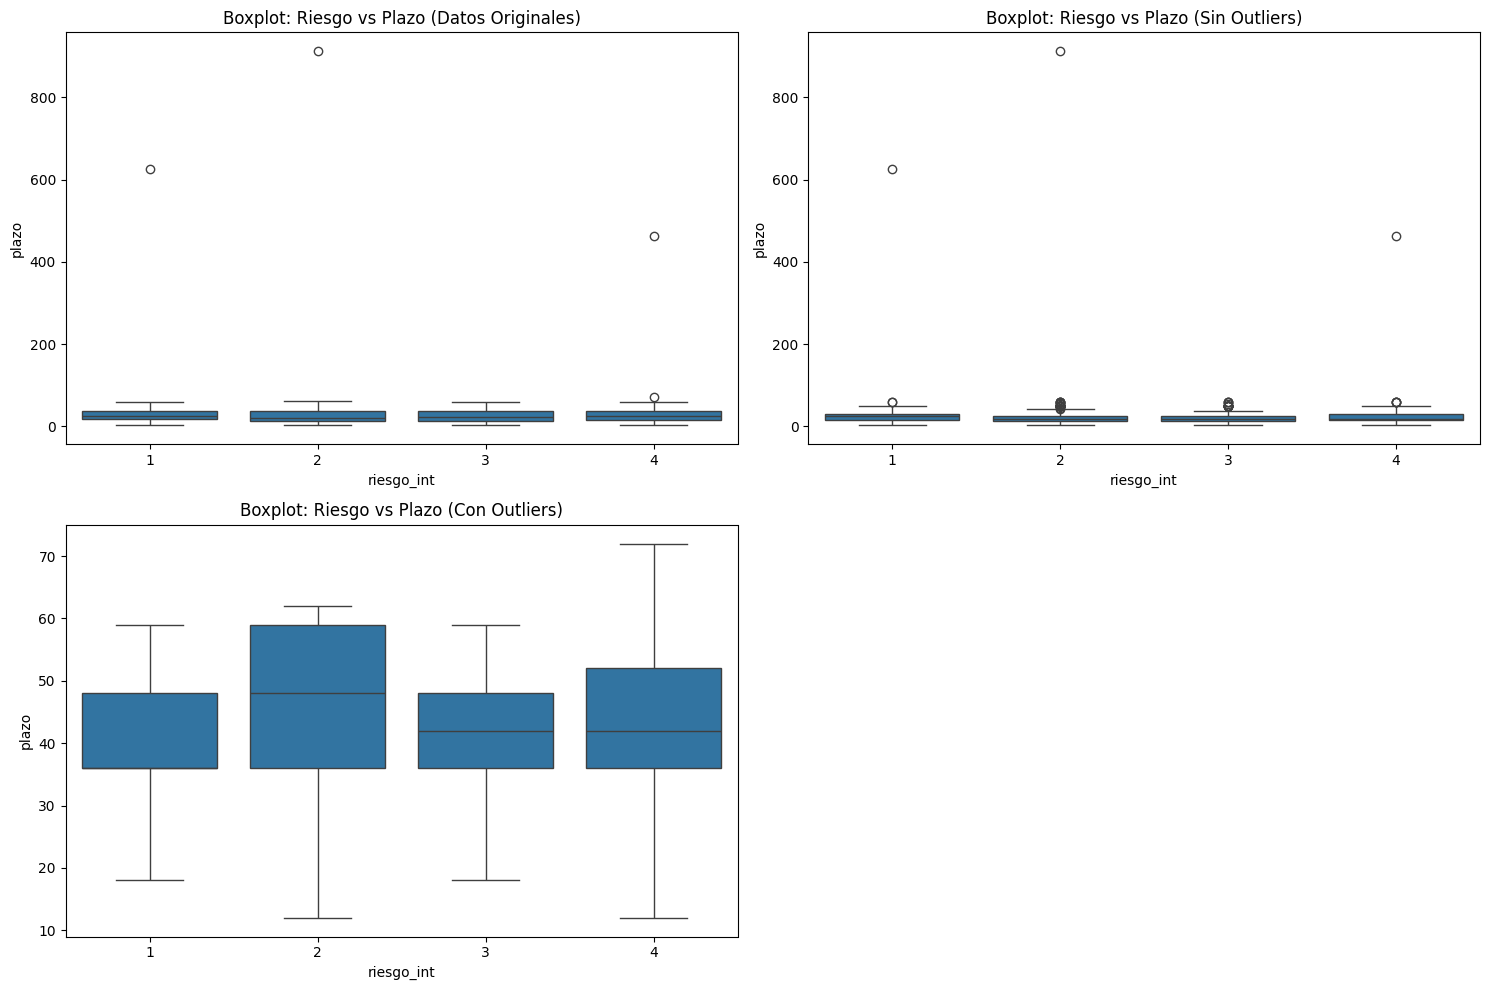

In [30]:

# Boxplots para comparar
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x=df['riesgo_int'], y=df['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Datos Originales)")


plt.subplot(2, 2, 2)
sns.boxplot(x=df_without_outliers['riesgo_int'], y=df_without_outliers['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Sin Outliers)")


plt.subplot(2, 2, 3)
sns.boxplot(x=df_with_outliers['riesgo_int'], y=df_with_outliers['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Con Outliers)")

plt.tight_layout()
plt.show()


Tras realizar distintos análisis estadísticos y visuales, se determinó que el **plazo del crédito no es un factor determinante** en el nivel de riesgo de los microcréditos.  

1. **Análisis de correlación**  
   - El coeficiente de correlación (\( R^2 \)) obtenido es **extremadamente bajo** (≈ 0.000034), lo que indica **una relación prácticamente inexistente** entre el plazo del crédito y el riesgo asociado.  

2. **Tablas de contingencia**  
   - La distribución de los niveles de riesgo en diferentes plazos **no muestra un patrón significativo**, lo que sugiere que el plazo **no influye directamente en la clasificación del riesgo**.  

3. **Boxplots comparativos**  
   - Los diagramas de caja (boxplots) comparativos no evidenciaron diferencias claras en la distribución del riesgo en función del plazo.  
   - Incluso después de eliminar outliers, la tendencia sigue siendo la misma, lo que refuerza la idea de que el plazo no impacta significativamente el nivel de riesgo.  